<a href="https://colab.research.google.com/github/cmorgan3324/Computer-Vision-Deep-CNN/blob/main/Computer_vision_Deep_CNN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Deep Convolusional Nueral Network from scratch for image classification

* 4 Convolution Layers (followed by Relu) - Apply filters to extract features from the input data (e.g., edges, textures in images). Each layer captures more complex features as depth increases. Relu is an activation function that only keeps positive values and ignores negative ones. It helps the model learn complex patterns by adding flexibility. ReLU introduces non-linearity to the network, important since real world data exhibits non linear relationships
* 2 Max Pooling Layers - A down-sizing operation that reduces the spatial dimensions (height and width) of feature maps by selecting the maximum value in a defined window (e.g., 2x2). It helps reduce computation and extracts dominant features.
* 3 Fully Connected Layers - Dense layers where every node is connected to every other node in the next layer. These layers combine extracted features to make predictions or classifications.

In [ ]:
# Import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

## Define (Deep) CNN architectures/classes


In [ ]:
class CNN(nn.Module):
  def __init__(self):
    # Initialize the class as a subclass of nn.Module
    super(CNN, self).__init__()

    # First convolutional layer
    self.conv1 = nn.Conv2d(3, 6, 5) # 3 input color channels (RGB), 6, output channels, and 5x5 kernel

    # First max pooling layer
    self.pool1 = nn.MaxPool2d(2, 2) # 2x2 kernel, stride of 2

    # Second convulutional layer
    self.conv2 = nn.Conv2d(6, 16, 5) # 6 input channels, 16 output channels, and 5x5 kernel

    # Second max pooling layer
    self.pool2 = nn.MaxPool2d(2, 2) # 2x2 kernel, stride of 2

    # 3 Fully connected layers
    # Linear transformation to 120-dimensional space
    self.fc1 = nn.Linear(16 * 5 * 5, 120) # Flattening the input, 16*5*5 input features, 120 output features

    # Linear transformation to 84-dimensional space
    self.fc2 = nn.Linear(120, 84) # 120 input features, 84 output features

    # Linear transformation to 10-dimensional space (output classes)
    self.fc3 = nn.Linear(84, 10) # 84 input features, 10 output features (number of classes)

  def forward(self, x):
    # Operation 1: first convolutional layer with ReLU activation and max pooling
    x = self.conv1(x)
    x = F.relu(x)
    x = self.pool1(x)

    # Operation 2: second convolutional layer with ReLU activation and max pooling
    x = self.conv2(x)
    x = F.relu(x)
    x = self.pool2(x)

    # Operation 3: Flattened layer: Reshape for fully connected layer
    x = x.view(-1, 16 * 5 * 5)

    # Operation 4: First fully connected layer with ReLU activation
    x = self.fc1(x)
    x = F.relu(x)

    # Operation 5: Second fully connected layer with ReLU activation
    x = self.fc2(x)
    x = F.relu(x)

    # Operation 6: Output layer (fully connected) w/ raw scroes for each class
    x = self.fc3(x)

    return x

In [ ]:
class DeepCNN(nn.Module):
  def __init__(self):
    # Initialize the class as a subclass of nn.Module
    super(DeepCNN, self).__init__()

    # Original convulutional layers
    self.conv1_in_channels = 3
    self.conv1_out_channels = 8
    self.conv1_kernel_size = 3
    self.conv1 = nn.Conv2d(self.conv1_in_channels, self.conv1_out_channels, kernel_size=self.conv1_kernel_size)

    self.conv2_in_channels = self.conv1_out_channels
    self.conv2_out_channels = 16
    self.conv2_kernel_size = 2
    self.conv2 = nn.Conv2d(self.conv2_in_channels, self.conv2_out_channels, kernel_size=self.conv2_kernel_size)

    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.conv3_in_channels = self.conv2_out_channels
    self.conv3_out_channels = 32
    self.conv3_kernel_size = 2
    self.conv3 = nn.Conv2d(self.conv3_in_channels, self.conv3_out_channels, kernel_size=self.conv3_kernel_size)

    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.conv4_in_channels = self.conv3_out_channels
    self.conv4_out_channels = 64
    self.conv4_kernel_size = 1
    self.conv4 = nn.Conv2d(self.conv4_in_channels, self.conv4_out_channels, kernel_size=self.conv4_kernel_size)

    # Fully Connected Layers
    self.fc1_in_features = self.conv4_out_channels * 6 * 6
    self.fc1_out_features = 100
    self.fc1 = nn.Linear(self.fc1_in_features, self.fc1_out_features)

    self.fc2_in_features = self.fc1_out_features
    self.fc2_out_features = 10
    self.fc2 = nn.Linear(self.fc2_in_features, self.fc2_out_features)

  def forward(self, x):
    # Original Operations
    x= self.conv1(x)
    x = F.relu(x)

    x = self.conv2(x)
    x = F.relu(x)
    x = self.pool1(x)

    # Additional Convolutional Layer Operation
    x = self.conv3(x)
    x = F.relu(x)
    x = self.pool2(x)

    x = self.conv4(x)
    x = F.relu(x)

    # Flatten layer: Reshape for fully connected layer
    x = x.view(-1, self.fc1_in_features)

    # Fully Connected Layer Operations
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)



    return x

In [ ]:
# model = CNN()
model = DeepCNN()
print(model)

DeepCNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(2, 2), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
  (fc1): Linear(in_features=2304, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
import torch
from torchsummary import summary # summary gives us an idea of the output shape

# Assuming 'model' is your CNN instance
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Get the appropriate device

# Move your model to the desired device (GPU if available)
model.to(device)

# Now, call summary
summary(model, (3, 32, 32)) # chennels, height, width

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 30, 30]             224
            Conv2d-2           [-1, 16, 29, 29]             528
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4           [-1, 32, 13, 13]           2,080
         MaxPool2d-5             [-1, 32, 6, 6]               0
            Conv2d-6             [-1, 64, 6, 6]           2,112
            Linear-7                  [-1, 100]         230,500
            Linear-8                   [-1, 10]           1,010
Total params: 236,454
Trainable params: 236,454
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.25
Params size (MB): 0.90
Estimated Total Size (MB): 1.16
----------------------------------------------------------------


## Training the model

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define the data transform for Data Augmentation -- transforms manipulate the image/object for the model to learn from varying perspectives and sizes
transform = transforms.Compose([
              transforms.RandomHorizontalFlip(),
              transforms.RandomRotation(10),
              transforms.RandomResizedCrop(32, scale=(0.8, 1.0), ratio=(1.0, 1.0)),
              transforms.ToTensor(),
              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
                               )

In [ ]:
# Load data
#Training data
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=16, shuffle=True, num_workers=2)

# Testing data
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=16, shuffle=False, num_workers=2)

# CIFAR-10 CLASSES
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:13<00:00, 12.9MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
# Print lengths of training and testing datasets
print(f"Length of training set: {len(trainset)}")
print(f"Length of testing set: {len(testset)}")

Length of training set: 50000
Length of testing set: 10000


## HyperParameters Optimization

In [ ]:
import torch.optim as optim

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

## CNN Training

In [ ]:
# Training loop
for epoch in range(10):
  train_loss = 0 # Initialize training loss accumulator for the epoch
  train_acc = 0 # Initialize training accuracy accumulator for the epoch

  model.train() # Set the model to training mode

  # Iterate over the training data loader
  for i, (inputs, labels) in enumerate(trainloader):
    # Move inputs and labels to the same device as the model
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad() # Clear previous gradients

    outputs = model(inputs) # Forward pass: compute model predictions
    loss = criterion(outputs, labels) # Calculate loss between predictions and ground truth labels

    loss.backward() # Backward pass: compute gradients of loss w.r.t model parameters
    optimizer.step() # Update model parameters

    train_loss += loss.item()

    # Calculate the training accuracy for the current batch
    _, preds = torch.max(outputs, 1) # Get predicted class labels
    train_acc += (preds == labels).float().mean() # Compute accuracy by comparing predictions w/ true labels

  # Calculate the average training loss and accuracy for the epoch
  train_loss /= i + 1
  train_acc /= i + 1
  scheduler.step() # Update the learning rate

  # Print epoch-wise training loss and accuracy
  print(f"Epoch {epoch+1}/{10}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")

Epoch 1/10, Train Loss: 1.6080, Train Acc: 0.4121
Epoch 2/10, Train Loss: 1.3345, Train Acc: 0.5200
Epoch 3/10, Train Loss: 1.2201, Train Acc: 0.5674
Epoch 4/10, Train Loss: 1.1468, Train Acc: 0.5945
Epoch 5/10, Train Loss: 1.0993, Train Acc: 0.6125
Epoch 6/10, Train Loss: 1.0588, Train Acc: 0.6280
Epoch 7/10, Train Loss: 1.0244, Train Acc: 0.6390
Epoch 8/10, Train Loss: 0.9987, Train Acc: 0.6499
Epoch 9/10, Train Loss: 0.9815, Train Acc: 0.6543
Epoch 10/10, Train Loss: 0.9604, Train Acc: 0.6616


## Testing Model

In [ ]:
# Validate the model on the Test Set
with torch.no_grad(): # Context manager to disable gradient calculation
  correct = 0 # Initialize counter for correct predictions
  total = 0 # Initialize counter for total predictions

  # model.eval() # Set the model to evaluation mode

  # Iterate over the testing data loader
  for inputs, labels in testloader:
    # Move inputs and labels to the same device as the model
    inputs, labels = inputs.to(device), labels.to(device)

    outputs = model(inputs) # Forward pass: compute model predictions
    _, predicted = torch.max(outputs.data, 1) # Get index of predicted class labels
    total += labels.size(0) # Update total count
    correct += (predicted == labels).sum().item() # Update correct count

  # Print the accuracy of the model on the validation set
  print(f"Accuracy of the model on the test set: {100 * correct / total}%")

Accuracy of the model on the test set: 64.34%


## Calculate Performance Metrics

* Confusion Matrix
* Recall
* Precision
* F1 Score

In [ ]:
!pip install plotly

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import plotly.figure_factory as ff # Import Plotly library for visualization
import numpy as np # Import NumPy library for numerical operations

# Evaluation loop
model.eval() # Set the model to evaluation mode
all_preds = [] # Initialize empty list to store all predictions
all_labels = [] # Initialize empty list to store all true labels

# Iterate over the test dataset
with torch.no_grad(): # Disable gradient calculation
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device) # Move inputs and labels to the same device as the model
        outputs = model(inputs) # Forward pass: compute model predictions
        _, preds = torch.max(outputs.data, 1) # Get index of predicted class labels

        # Collect predictions and true labels
        all_preds.extend(preds.cpu().numpy()) # Append predicted labels to the list
        all_labels.extend(labels.cpu().numpy()) # Append true labels to the list

# Calculate the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds, normalize='true') # Compute confusion matrix

# Plot confusion matrix using plotly
fig = ff.create_annotated_heatmap(
    z=conf_matrix, # Data for heatmap
    x=classes, # x axis label (predicted labels)
    y=classes, # y axis label (true labels)
    colorscale='Viridis',
    showscale=True # Color scale legend
)

# Update the layout of plot
fig.update_layout(
    title='Confusion Matrix',
    xaxis=dict(title='Predicted'),
    yaxis=dict(title='True')
)

fig.show() # Display the confusion matrix plot

# Generate abd print classifcation report
class_report = classification_report(all_labels, all_preds, target_names=classes) # Generate the classification report
print("\nClassification Report:")
print(class_report) # Print the classification report


Classification Report:
              precision    recall  f1-score   support

       plane       0.71      0.66      0.69      1000
         car       0.79      0.74      0.77      1000
        bird       0.53      0.57      0.55      1000
         cat       0.47      0.43      0.44      1000
        deer       0.62      0.52      0.57      1000
         dog       0.47      0.68      0.56      1000
        frog       0.67      0.77      0.71      1000
       horse       0.76      0.61      0.68      1000
        ship       0.76      0.76      0.76      1000
       truck       0.78      0.69      0.73      1000

    accuracy                           0.64     10000
   macro avg       0.66      0.64      0.64     10000
weighted avg       0.66      0.64      0.64     10000



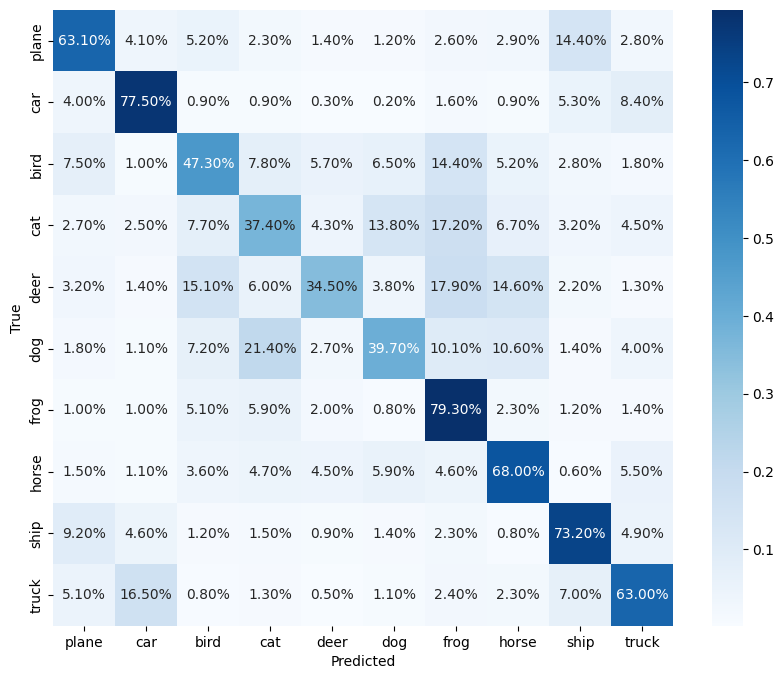

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have `all_labels` and `all_preds` from your previous code

# Calculate the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix in percentages
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2%", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()